# Simulator runner

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
%config Application.log_level="INFO"

In [2]:
from playground import InferenceJob, TrainingJob, get_optimus_fn, get_tanh_fn, get_linear_fn, get_tanh_fn, simulator, fair_scheduler, thief_scheduler

In [9]:
a_conv_time = 3
b_conv_time = 5
target_start_accuracy = 5
a_func, a_inv_func = get_optimus_fn(a_conv_time)
b_func, b_inv_func = get_optimus_fn(b_conv_time)
init_time_a = a_inv_func(target_start_accuracy)
init_time_b = b_inv_func(target_start_accuracy)

A_inference = InferenceJob("A_Inference", target_start_accuracy, get_tanh_fn(1)[0], resource_alloc=0)
B_inference = InferenceJob("B_Inference", target_start_accuracy, get_tanh_fn(1)[0], resource_alloc=0)
A_train = TrainingJob("A_Train", a_func, init_time_a, a_conv_time, resource_alloc=0, inference_job=A_inference)
B_train = TrainingJob("B_Train", b_func, init_time_b, b_conv_time, resource_alloc=0, inference_job=B_inference)

training_jobs = [A_train, B_train]
inference_jobs = [A_inference, B_inference]

In [10]:
initial_alloc = {j: 0.25 for j in training_jobs+inference_jobs}

In [11]:
initial_alloc

{<playground.TrainingJob at 0x7f58bf64d400>: 0.25,
 <playground.TrainingJob at 0x7f58bf64d3c8>: 0.25,
 <playground.InferenceJob at 0x7f58bf64d320>: 0.25,
 <playground.InferenceJob at 0x7f58bf64d358>: 0.25}

In [12]:
sim = simulator(training_jobs, inference_jobs, 1, initial_allocation=initial_alloc, retraining_period=200, scheduling_algo=fair_scheduler, sim_name='main')
results = sim.step_till_completion()

Period allocation: {0: {<playground.TrainingJob object at 0x7f58bf64d400>: 0.25, <playground.TrainingJob object at 0x7f58bf64d3c8>: 0.25, <playground.InferenceJob object at 0x7f58bf64d320>: 0.25, <playground.InferenceJob object at 0x7f58bf64d358>: 0.25}, 11.936842105263159: {<playground.TrainingJob object at 0x7f58bf64d400>: 0, <playground.TrainingJob object at 0x7f58bf64d3c8>: 0.3333333333333333, <playground.InferenceJob object at 0x7f58bf64d320>: 0.3333333333333333, <playground.InferenceJob object at 0x7f58bf64d358>: 0.3333333333333333}, 17.905263157894737: {<playground.TrainingJob object at 0x7f58bf64d3c8>: 0, <playground.InferenceJob object at 0x7f58bf64d320>: 0.5, <playground.InferenceJob object at 0x7f58bf64d358>: 0.5}}
Period allocation: {0: {<playground.TrainingJob object at 0x7f58bf64d400>: 0.25, <playground.TrainingJob object at 0x7f58bf64d3c8>: 0.25, <playground.InferenceJob object at 0x7f58bf64d320>: 0.25, <playground.InferenceJob object at 0x7f58bf64d358>: 0.25}, 11.936842

Fair sched final alllocation: {0: {<playground.TrainingJob object at 0x7f58bf64d400>: 0.25, <playground.TrainingJob object at 0x7f58bf64d3c8>: 0.25, <playground.InferenceJob object at 0x7f58bf64d320>: 0.25, <playground.InferenceJob object at 0x7f58bf64d358>: 0.25}, 11.936842105263159: {<playground.TrainingJob object at 0x7f58bf64d400>: 0, <playground.TrainingJob object at 0x7f58bf64d3c8>: 0.3333333333333333, <playground.InferenceJob object at 0x7f58bf64d320>: 0.3333333333333333, <playground.InferenceJob object at 0x7f58bf64d358>: 0.3333333333333333}, 17.905263157894737: {<playground.TrainingJob object at 0x7f58bf64d3c8>: 0, <playground.InferenceJob object at 0x7f58bf64d320>: 0.5, <playground.InferenceJob object at 0x7f58bf64d358>: 0.5}}


138
138
139
139
140
140
141
141
142
142
143
143
144
144
145
145
146
146
147
147
148
148
149
149
150
150
151
151
152
152
153
153
154
154
155
155
156
156
157
157
158
158
159
159
160
160
161
161
162
162
163
163
164
164
165
165
166
166
167
167
168
168
169
169
170
170
171
171
172
172
173
173
174
174
175
175
176
176
177
177
178
178
179
179
180
180
181
181
182
182
183
183
184
184
185
185
186
186
187
187
188
188
189
189
190
190
191
191
192
192
193
193
194
194
195
195
196
196
197
197
198
198
199
199
200
200
201
201
Simulator steps done.
Simulator steps done.


# Visualization

### Accuracy progression

Text(0, 0.5, 'Accuracy')

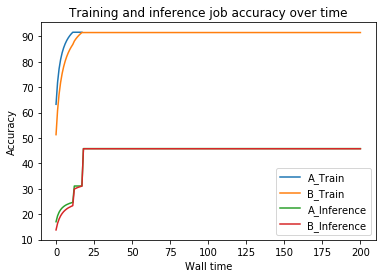

In [13]:
plt.figure()
for job, result in results.items():
    if job != 'meta':
        t, acc = list(zip(*result))
        plt.plot(t, acc, label=job.name)
plt.title("Training and inference job accuracy over time")
plt.legend()
plt.xlabel("Wall time")
plt.ylabel("Accuracy")

In [14]:
for t, allocation in sim.initial_allocation.items():
    names = []
    allocs = []
    for j, alloc in allocation.items():
        allocs.append(alloc)
        names.append(j.name)
    print(names, allocs)
    plt.figure()
    plt.pie(allocs, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title("Allocation at t = {}".format(t))

AttributeError: 'float' object has no attribute 'items'

In [15]:
means = []
for j, result in results.items():
    if isinstance(j, InferenceJob):
        mean_accuracy = sum(r[1] for r in result)/len(result)
        means.append(mean_accuracy)
MEAN_AUC = sum(means)/len(means)
print("Mean Inference Accuracy across all jobs: {}".format(MEAN_AUC))

Mean Inference Accuracy across all jobs: 43.860120025727525
